 **Проект:      ОБУЧЕНИЕ С УЧИТЕЛЕМ: КАЧЕСТВО МОДЕЛИ**

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Здачи проекта**


    
**План проекта**

    Шаг 1. Загрузить данные
    Шаг 2. Предобработатьданных
    Шаг 3. Исследовательский анализ данных
    Шаг 4. Провести корреляционный анализ признаков в датасете ferma_main.csv
    Шаг 5. Задача регрессии 
    Шаг 6. Задача классификации
    Шаг 7. Сделайть выводы

## Шаг 1. Загрузка данных

In [1]:
# выгружаем нужные библиотеки
import pandas as pd
import numpy as np

# модели
# загружаем нужные модели
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#метрики
# выгрузим метрики
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix,
    f1_score,
    r2_score,
    precision_score,
    recall_score,
    precision_recall_curve,
    mean_squared_error,
    mean_absolute_error,
    roc_curve,
    roc_auc_score
)

# графики
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 


<font color='green'>
<div class="alert-dark"> 
<b>✅ Комментарий студента:👩🏼‍🎓 </b>
<br> Совершенно согласна. 🙂</font>
</div>

In [2]:
!pip install shap -U -q
import shap

In [3]:
!pip install --upgrade scikit-learn -q

  You can safely remove it manually.


In [103]:
!pip install -U scikit-learn

In [104]:
# загружаем файлы
cast_actions = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
profit = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
ave_profit = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv',sep=';', decimal=',')

In [105]:
#отобразим все колонки
pd.set_option('display.max_columns', None)

In [106]:
def data (df):
    display(df.head(5))
      
    print('-------------------------------------------------------------------------------')
    print('--------------------------------info()-----------------------------------------')
    print('-------------------------------------------------------------------------------')
    display(df.info())
    print('-------------------------------------------------------------------------------')
    print('--------------------------------describe()-------------------------------------')
    print('-------------------------------------------------------------------------------')
    print(df.describe())
    print('-------------------------------------------------------------------------------')
    print('--------------------------------Shape------------------------------------------')
    print('-------------------------------------------------------------------------------')
    print('Таблица содержит', df.shape[0], 'строк и',  df.shape[1], 'столбцов')
    print('-------------------------------------------------------------------------------')
    print('--------------------------------duplicated()-----------------------------------')
    print('-------------------------------------------------------------------------------')
    if len(df[df.duplicated()])> 0:
        print('__________________________________')
        print('Колличество повторяющихся записей:', len(df[df.duplicated()]))
        print('__________________________________')
        print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())    
    else:
        print('Нет повторяющихся записей')


In [107]:
data(cast_actions)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


-------------------------------------------------------------------------------
--------------------------------info()-----------------------------------------
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   f

None

-------------------------------------------------------------------------------
--------------------------------describe()-------------------------------------
-------------------------------------------------------------------------------
                  id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просм

In [108]:
data(profit)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


-------------------------------------------------------------------------------
--------------------------------info()-----------------------------------------
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

-------------------------------------------------------------------------------
--------------------------------describe()-------------------------------------
-------------------------------------------------------------------------------
                  id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000
-------------------------------------------------------------------------------
--------------------------------Shape------------------------------------------
-------------------------------------------------------------------------------
Таблица содержит 3900 строк и 3 столбцов
-------------------------------------------------------------------------------
--------------------------------duplicated()-------------------------------

In [109]:
data(time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


-------------------------------------------------------------------------------
--------------------------------info()-----------------------------------------
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

-------------------------------------------------------------------------------
--------------------------------describe()-------------------------------------
-------------------------------------------------------------------------------
                  id        минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000
-------------------------------------------------------------------------------
--------------------------------Shape------------------------------------------
-------------------------------------------------------------------------------
Таблица содержит 2600 строк и 3 столбцов
-------------------------------------------------------------------------------
--------------------------------duplicated()-----------------------------------
-------------

In [110]:
data(ave_profit)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


-------------------------------------------------------------------------------
--------------------------------info()-----------------------------------------
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

-------------------------------------------------------------------------------
--------------------------------describe()-------------------------------------
-------------------------------------------------------------------------------
                  id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000
-------------------------------------------------------------------------------
--------------------------------Shape------------------------------------------
-------------------------------------------------------------------------------
Таблица содержит 1300 строк и 2 столбцов
-------------------------------------------------------------------------------
--------------------------------duplicated()-----------------------------------
-------------

**====================================================================================================**

### Предварителный вывод

**====================================================================================================**
__________________________________________________________________________________________________

<font color='blue'>**cast_actions**:</font>- данные о поведении покупателей на вайте
__________________________________________________________________________________________________

фрейм содердит 1300 строк и 13 столбцов.
При этом 7 столбцов с целочисленными данными тип < int64 >, 2 с числовыми данными типа < float64 > и 4 столбца типа < object >.

**столбцы таблицы и информация, которую они содержат:**

    'id' — номер покупателя в корпоративной базе данных.
    'Покупательская активность' — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    'Тип сервиса' — уровень сервиса, например «премиум» и «стандарт».
    'Разрешить сообщат'ь — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    'Маркет_актив_6_мес' — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    'Маркет_актив_тек_мес' — количество маркетинговых коммуникаций в текущем месяце.
    'Длительность' — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    'Акционные_покупки' — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    'Популярная_категория' — самая популярная категория товаров у покупателя за последние 6 месяцев.
    'Средний_просмотр_категорий_за_визит' — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    'Неоплаченные_продукты_штук_квартал' — общее число неоплаченных товаров в корзине за последние 3 месяца.
    'Ошибка_сервиса' — число сбоев, которые коснулись покупателя во время посещения сайта.
    'Страниц_за_визит' — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

 - В таблице нет дубликатов, нет пропусков, таблица соотвествует описанию. 

__________________________________________________________________________________________________

<font color='blue'>**profit**:</font>- данные о выручке с покупателей
__________________________________________________________________________________________________

фрейм содердит 3900 строк и 3 столбцов.
При этом 1 столбец с целочисленными данными тип < int64 >, 1 с числовыми данными типа < float64 > и 1 столбец типа < object >.

**столбцы таблицы и информация, которую они содержат:**
    
    'id' — номер покупателя в корпоративной базе данных.
    'Период' — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    'Выручка'' — сумма выручки за период.
    
 - В таблице нет дубликатов, нет пропусков, таблица соотвествует описанию. 

__________________________________________________________________________________________________

<font color='blue'>**time**:</font>- данные о времени (минуты), проведенном покупателями на сайте
__________________________________________________________________________________________________

фрейм содердит 2600 строк и 3 столбцов.
При этом 2 столбца с целочисленными данными тип < int64 > и 1 столбец типа < object >.

**столбцы таблицы и информация, которую они содержат:**
    
    'id' — номер покупателя в корпоративной базе данных.
    'Период' — название периода, во время которого зафиксировано общее время.
    'минут' — значение времени, проведённого на сайте, в минутах.

<font color='red'>Обратить внимание:</font>

в колонке Период имееться опечатка в слове предыдцщий_месяц

 - В таблице нет дубликатов, нет пропусков, таблица соотвествует описанию. 

__________________________________________________________________________________________________

<font color='blue'>**ave_profit**:</font>- данные о выручке с покупателей
_____________________________________________

фрейм содердит 1300 строк и 2 столбца.
При этом 1 столбец с целочисленными данными тип < int64 > и 1 с числовыми данными типа < float64 >.

**столбцы таблицы и информация, которую они содержат:**

    'id' — номер покупателя в корпоративной базе данных.
    'Прибыль' — значение прибыли.

 - В таблице нет дубликатов, нет пропусков, таблица соотвествует описанию. 

## Шаг 2. Предобработка данных

In [111]:
# создаем копии датасетов до преобразования
cast_actions_c = cast_actions.copy() 
profit_c = profit.copy() 
time_c = time.copy() 
ave_profit_c = ave_profit.copy()
print(len(cast_actions_c))
print(len(profit_c))
print(len(time_c))
print(len(ave_profit_c))

1300
3900
2600
1300


* Проверим фреймы на наличие пропусков, дубликатов и актуальности типов данных

- создадим функцию для отображения пропусков  

In [112]:
# функция для отображения пропусков
def is_null(df):
# построем тепловую карту и посмотрим визуально пропуски в колонках
    cols = df.columns[:4] 
# определяем цвета #000099
# желтый - пропущенные данные, синий - не пропущенные
    colours = ['blue', 'pink'] 
    sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colours))
    print(df.isna().sum())

### cast_actions

- проверим пропущенные значения

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64


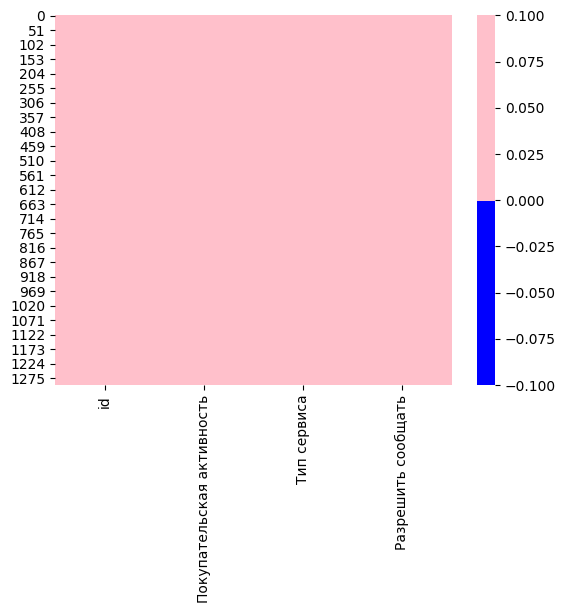

In [113]:
is_null(cast_actions)

- пропусков нет

- проверим дубликаты

In [114]:
print('Колличество повторяющихся записей', cast_actions.duplicated().sum())

Колличество повторяющихся записей 0


- дубликатов нет

In [115]:
# проверим колонки на дубликаты
cast_actions.nunique()

id                                     1300
Покупательская активность                 2
Тип сервиса                               3
Разрешить сообщать                        2
Маркет_актив_6_мес                       41
Маркет_актив_тек_мес                      3
Длительность                            658
Акционные_покупки                        42
Популярная_категория                      6
Средний_просмотр_категорий_за_визит       6
Неоплаченные_продукты_штук_квартал       11
Ошибка_сервиса                           10
Страниц_за_визит                         20
dtype: int64

In [116]:
cast_actions['Покупательская активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [117]:
cast_actions['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [118]:
cast_actions['Тип сервиса'].value_counts()

стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64

- в колонке 'Тип сервиса' - обнаружен дубликат 'стандартт', 'стандарт', приведем данные к одному 'стандарт'

In [119]:
cast_actions.loc[(cast_actions['Тип сервиса'] == 'стандартт'), 'Тип сервиса'] = 'стандарт'
cast_actions['Тип сервиса'].value_counts()

стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64

In [120]:
cast_actions['Разрешить сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [121]:
cast_actions['Маркет_актив_6_мес'].unique()

array([3.4, 4.4, 4.9, 3.2, 5.1, 3.3, 4.7, 4.2, 3.9, 4.6, 4.3, 3.8, 2.7,
       4.8, 2.9, 3. , 2.4, 1.7, 3.6, 4. , 1.5, 3.5, 4.1, 3.1, 1.4, 0.9,
       5.6, 2.6, 5.5, 5.2, 5.8, 5. , 5.4, 5.7, 5.3, 3.7, 6.3, 6.6, 4.5,
       6.1, 5.9])

In [122]:
cast_actions['Маркет_актив_тек_мес'].unique()

array([5, 4, 3], dtype=int64)

In [123]:
cast_actions['Акционные_покупки'].unique()

array([0.  , 0.75, 0.14, 0.99, 0.94, 0.26, 0.23, 0.17, 0.13, 0.35, 0.74,
       0.29, 0.98, 0.95, 0.22, 0.4 , 0.24, 0.21, 0.39, 0.9 , 0.89, 0.27,
       0.33, 0.34, 0.32, 0.93, 0.3 , 0.28, 0.31, 0.25, 0.36, 0.16, 0.11,
       0.2 , 0.18, 0.15, 0.6 , 0.12, 0.19, 0.44, 0.47, 0.91])

In [124]:
cast_actions['Средний_просмотр_категорий_за_визит'].unique()

array([6, 4, 5, 3, 2, 1], dtype=int64)

In [125]:
cast_actions['Неоплаченные_продукты_штук_квартал'].unique()

array([ 2,  4,  0,  1,  3,  5,  8,  6,  9, 10,  7], dtype=int64)

In [126]:
cast_actions['Ошибка_сервиса'].unique()

array([1, 2, 6, 3, 7, 9, 4, 5, 8, 0], dtype=int64)

In [127]:
cast_actions['Страниц_за_визит'].unique()

array([ 5,  4,  2,  3,  7,  1,  6,  8,  9, 14, 11, 15, 16, 10, 17, 13, 12,
       18, 19, 20], dtype=int64)

### profit

- проверим пропущенные значения

id         0
Период     0
Выручка    0
dtype: int64


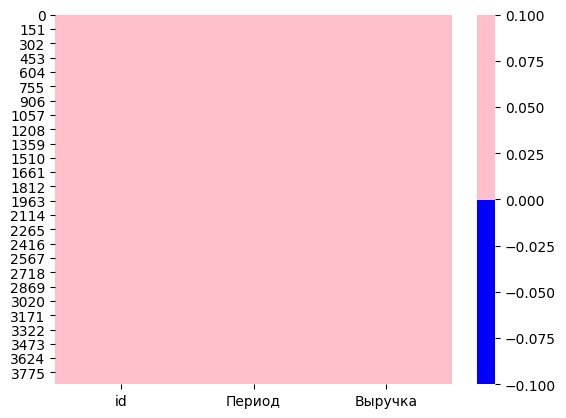

In [128]:
is_null(profit)

- отсутсвующих значений нет

- проверим дубликаты

In [129]:
print('Колличество повторяющихся записей',(profit.duplicated().sum()))

Колличество повторяющихся записей 0


In [130]:
# проверим колонки на дубликаты
profit.nunique()

id         1300
Период        3
Выручка    2776
dtype: int64

In [131]:
profit['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

- неявных дубликатов тоже не выявленно

### time

- проверим пропущенные значения

id        0
Период    0
минут     0
dtype: int64


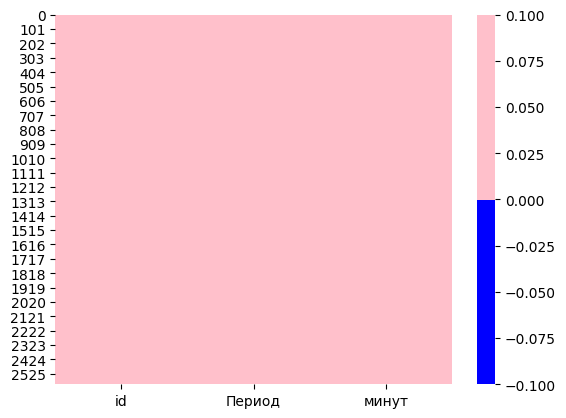

In [132]:
is_null(time)

- отсутсвующих значений нет

- проверим дубликаты

In [133]:
print('Колличество повторяющихся записей',(time.duplicated().sum()))

Колличество повторяющихся записей 0


In [134]:
# проверим колонки на дубликаты
time.nunique()

id        1300
Период       2
минут       20
dtype: int64

In [135]:
time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

- обнаружена опечатка - заменим 'предыдцщий_месяц' на 'предыдущий_месяц'

In [136]:
time.loc[(time['Период'] == 'предыдцщий_месяц'), 'Период'] = 'предыдущий_месяц'
time['Период'].value_counts()

текущий_месяц       1300
предыдущий_месяц    1300
Name: Период, dtype: int64

### ave_profit

- проверим пропущенные значения

id         0
Прибыль    0
dtype: int64


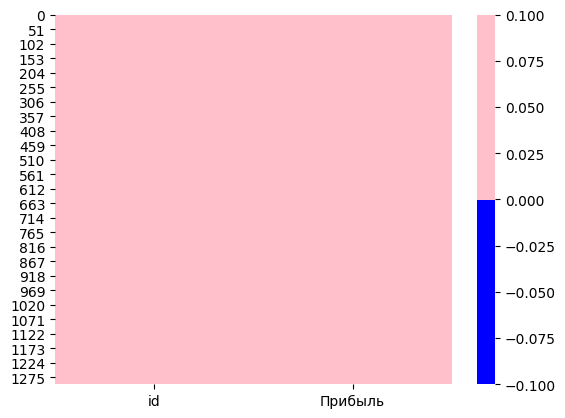

In [137]:
is_null(ave_profit)

- отсутсвующих значений нет

- проверим дубликаты

In [138]:
print('Колличество повторяющихся записей',ave_profit.duplicated().sum())

Колличество повторяющихся записей 0


In [139]:
# проверим колонки на дубликаты
ave_profit.nunique()

id         1300
Прибыль     400
dtype: int64

**====================================================================================================**

### Вывод

**====================================================================================================**
__________________________________________________________________________________________________

<font color='blue'>**cast_actions**:</font>
__________________________________________________________________________________________________

- нет отсутсвующих значений
- в колонке 'Тип сервиса' был неявный дубликат, который заменили с на 'стандартт', на  'стандарт'

__________________________________________________________________________________________________

<font color='blue'>**profit**:</font>
__________________________________________________________________________________________________

- нет отсутсвующих значений
- нет отсутсвующих значений

__________________________________________________________________________________________________

<font color='blue'>**time**:</font>
__________________________________________________________________________________________________

- нет отсутсвующих значений
- неявные дубликаты не обнаруженны
- в колонке 'Период' была замечена опечатка. Произвели замену с 'предыдцщий_месяц' на 'предыдущий_месяц'


<font color='blue'>**ave_profit**:</font>
__________________________________________________________________________________________________

- нет отсутсвующих значений
- неявные дубликаты не обнаруженны


Переработка данных завершена, таблицы готовы к исследовательскому анализу. 


## Шаг 3. Исследовательский аналих данных

In [140]:
def sep (cast_actions):
    cats = list(cast_actions.select_dtypes(include=['object']).columns)
    nums = list(cast_actions.select_dtypes(exclude=['object']).columns)
    print(f'categorical variables:  {cats}')
    print(f'numerical variables:  {nums}')

### cast_actions

In [141]:
#  выгрузим категориальные и числовые признаки
sep (cast_actions)

categorical variables:  ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']
numerical variables:  ['id', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']


In [142]:
#ознакомления с ДатаСетом
#посмотрим статистику по числовым признакам
cast_actions.drop(['id'], axis=1).describe()

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


- визуализируем размпределение числовых признаков

<Figure size 1000x300 with 0 Axes>

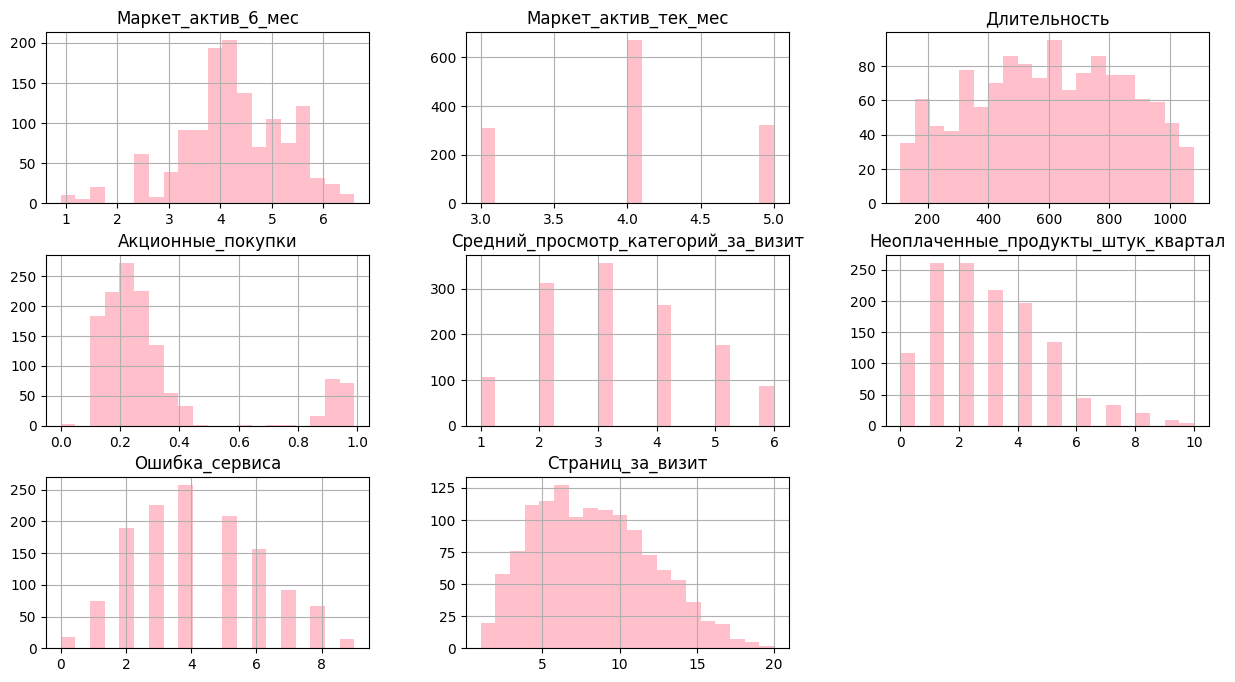

In [143]:
plt.figure(figsize=(10, 3))

cast_actions[['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']].hist(bins = 20, figsize=(15, 8))
sns.set_palette(['pink'])
plt.show()

- 'Маркет_актив_6_мес', 'Длительность', 'Ошибка_сервиса' выглядят как нормальное распределение
- 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал', 'Страниц_за_визит' имеют небольшое отклонение влево
- интересный провал наблюдаеться в  столбце 'Акционные_покупки'

In [144]:
#ознакомления с ДатаСетом
#посмотрим статистику по не числовым признакам
cast_actions.describe (include= ['object', 'bool'])

,Покупательская активность,Тип сервиса,Разрешить сообщать,Популярная_категория
count,1300,1300,1300,1300
unique,2,2,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,924,962,330


При статистическом анализе можно сказать:

    - в таблице 1300 записей
    - в колонках 'Покупательская активность','Тип сервиса','Разрешить сообщать' по 2 уникальных значения
    -  в колонке 'Популярная_категория' 6 уникальных значений
    - Товары для детей самая популярная категория
    - покупательская способность клиентов в целом сохраняет прежний уровень
    - тип сервиса 'Стандарт' более популярный среди покупателей
    - больше половины покупателей оставили согласие на коммуникацию.
    

- так как нас интерисует Покупательская активность, то рассмотрим Покупательскую активность клиентов по каждому признаку отдельно сначало с числовыми признаками, затем с нечисловыми

**Покупательская активность клиентов по численному признаку**

- рассмотрим расспределение Покупательской активности и Маркет_актив_6_мес

In [145]:
import plotly.express as px
fig = px.histogram(cast_actions,
                  x = 'Маркет_актив_6_мес',
                  color = 'Покупательская активность',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение Маркет_актив_6_мес')
fig.show()

- здесь мы видим, чем выше покупательская активность,тем ниже вероятность снижения пакупательской активности клиентов. 
На графике видно что клиенты, которые получили 4 и более макретинговых коммуникаций чаще сохраняют свою покупательскую активность. 

- рассмотрим расспределение Покупательской активности и Маркет_актив_тек_мес

In [146]:
fig = px.histogram(cast_actions,
                  x = 'Маркет_актив_тек_мес',
                  color = 'Покупательская активность',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение Маркет_актив_тек_мес')
fig.show()

- из графика видно, что в текущем месяце было от 3 до 5 коммуникаций с клиентами.  
При 3 и 5 коммуникаций у большей половины клиентов поупательскя активность снизиласи. 
При 4 коммуникаций половина покупателей снизило свою покупательскую активность.
Возможно это месяц такой так как в графике с большем периодом  Маркет_актив_тек_мес данные немного другие. Нужно в целом посмотреть покупательскую способность в разрезе периода.

- рассмотрим расспределение Покупательской активности и Длительность

In [147]:
fig = px.histogram(cast_actions,
                  x = 'Длительность',
                  color = 'Покупательская активность',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение Длительность')
fig.show()

- при длительности 650-700 дней и от 1050 дней с начала регистрации покупательская активность клиентов снижаеться больше, чем сохраняется

- рассмотрим расспределение Покупательской активности Акционные_покупки

In [148]:
fig = px.histogram(cast_actions,
                  x = 'Акционные_покупки',
                  color = 'Покупательская активность',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение Акционные_покупки')
fig.show()

- при среднемесячной доли покупок по акции от 0,13 до 0,17  Покупательской активности максимально сохраняеться.
- при среднемесячной доли покупок по акции от 0,33 до 0,42  Покупательская активность снижена. 

- рассмотрим расспределение Покупательской активности и Средний_просмотр_категорий_за_визит

In [149]:
fig = px.histogram(cast_actions,
                  x = 'Средний_просмотр_категорий_за_визит',
                  color = 'Покупательская активность',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение Средний_просмотр_категорий_за_визит')
fig.show()

- здесь мы можем отметить, что покупалели, которые за последний меся просмотрел категорий  от 1 до 2 раз, чаще всего снижают покупательскую активность.
- покупатели, просмотревшие от 3 и выше категорий сохраняют свою покупательскую активность

- рассмотрим расспределение Покупательской активности и Неоплаченные_продукты_штук_квартал

In [150]:
fig = px.histogram(cast_actions,
                  x = 'Неоплаченные_продукты_штук_квартал',
                  color = 'Покупательская активность',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение Неоплаченные_продукты_штук_квартал')
fig.show()

- чеи больше товаров лежит в корзине, тем выше вероятность, что покупательская способность снижаеться. 
- при 4х неоплаченных товаров в корзине покупательская активность сохраняеться, особенно она сильна при 1 необлаченном товаре в корзине. 

- рассмотрим расспределение Покупательской активности  и Ошибка_сервиса

In [151]:
fig = px.histogram(cast_actions,
                  x = 'Ошибка_сервиса',
                  color = 'Покупательская активность',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение Ошибка_сервиса')
fig.show()

- тут видно, что от 1 до 3 ошибок сильно снижает покупательскую активность, но самое интересное, что с возрастанием ошибок сервиса покупателская активность не снижаеться. Можно сказать, что самые нетерпиливые сразу оставляют свой интерес к магазину. а самые лояльные клиенты остаються. 

- рассмотрим расспределение Покупательской активности и Страниц_за_визит

In [152]:
fig = px.histogram(cast_actions,
                  x = 'Страниц_за_визит',
                  color = 'Покупательская активность',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение Страниц_за_визит')
fig.show()

- очень наглядныя завиисимость чем меньше (до 6 страниц) смотрит клиент, тем выше вероятность, что клиент снизит покупательскую активность. И наоборот, чем больше клиент просмотрел страниц за визит, тев выше покупательская активность клиента. Логично, возможно покупатель просто искал ему нужный товар.

**Покупательская активность клиентов по нечисленному признаку**

In [153]:
a = cast_actions[['Покупательская активность','Тип сервиса']].value_counts().reset_index()
a = pd.DataFrame(a)
a.columns = ['Покупательская активность','Тип сервиса', 'count']
a

,Покупательская активность,Тип сервиса,count
0,Прежний уровень,стандарт,596
1,Снизилась,стандарт,328
2,Прежний уровень,премиум,206
3,Снизилась,премиум,170


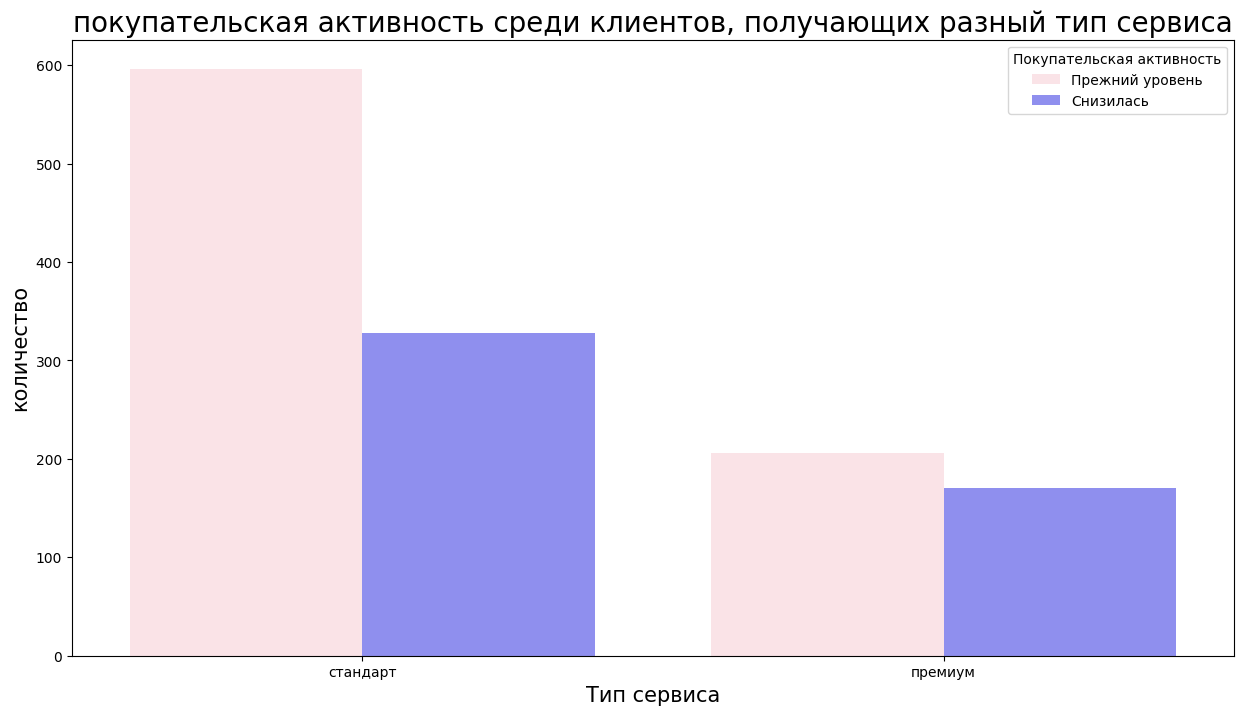

In [154]:
#сформируем график вкуса молока
plt.figure(figsize = ( 15 , 8 )) 
sns.barplot(palette=['pink', 'blue'],
            alpha = 0.5,
            x = 'Тип сервиса', 
            y = 'count',
            hue = 'Покупательская активность',
            data = a
          )

plt.xlabel('Тип сервиса', size= 15)
plt.ylabel('количество', size= 15)
plt.title ('покупательская активность среди клиентов, получающих разный тип сервиса', size= 20)
plt.show()

- при  типе сервисе Премиум покупательская активности снижена

In [155]:
a = cast_actions[['Покупательская активность','Разрешить сообщать']].value_counts().reset_index()
a = pd.DataFrame(a)
a.columns = ['Покупательская активность','Разрешить сообщать', 'count']
a

,Покупательская активность,Разрешить сообщать,count
0,Прежний уровень,да,591
1,Снизилась,да,371
2,Прежний уровень,нет,211
3,Снизилась,нет,127


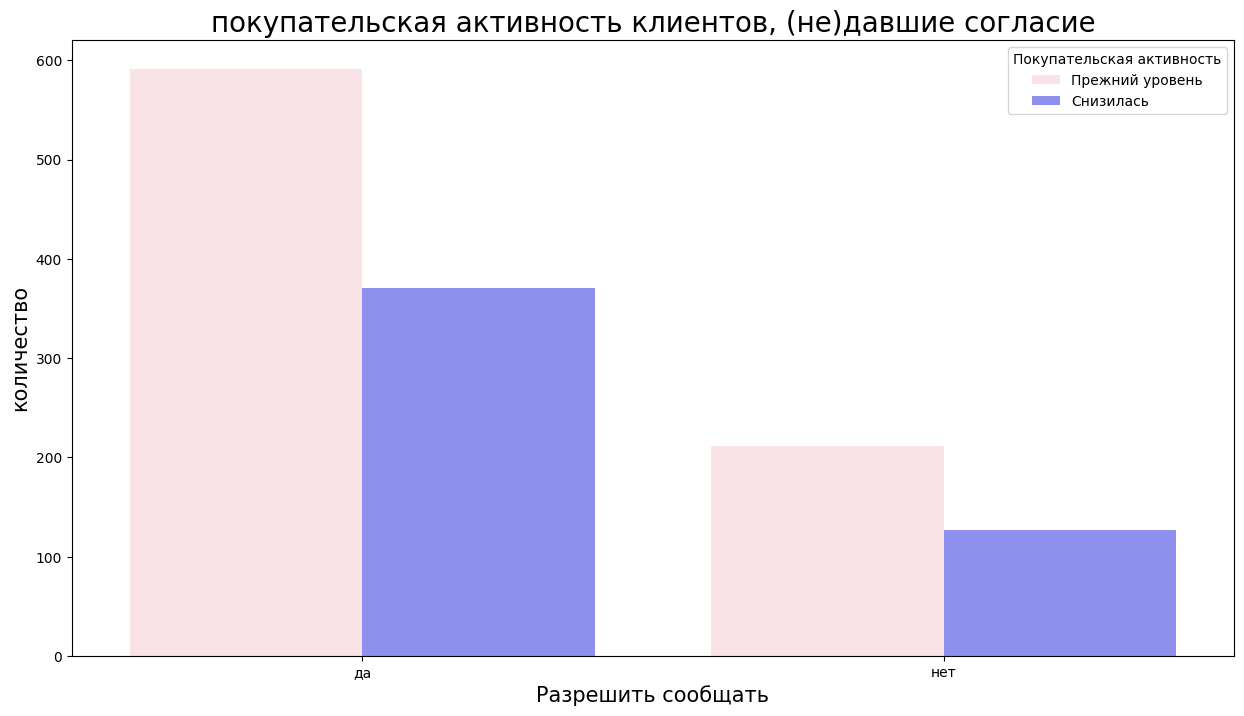

In [156]:
#сформируем график вкуса молока
plt.figure(figsize = ( 15 , 8 )) 
sns.barplot(palette=['pink', 'blue'],
            alpha = 0.5,
            x = 'Разрешить сообщать', 
            y = 'count',
            hue = 'Покупательская активность',
            data = a
          )

plt.xlabel('Разрешить сообщать', size= 15)
plt.ylabel('количество', size= 15)
plt.title ('покупательская активность клиентов, (не)давшие согласие', size= 20)
plt.show()

- среди клиентов не давшие согласие, что бы можно им было присылать дополнительную информацию , больше вероятность снижения покупательской активности. 

In [157]:
a = cast_actions[['Покупательская активность','Популярная_категория']].value_counts().reset_index()
a = pd.DataFrame(a)
a.columns = ['Покупательская активность','Популярная_категория', 'count']
a

,Покупательская активность,Популярная_категория,count
0,Прежний уровень,Товары для детей,184
1,Прежний уровень,Домашний текстиль,149
2,Прежний уровень,Мелкая бытовая техника и электроника,147
3,Снизилась,Товары для детей,146
4,Прежний уровень,Техника для красоты и здоровья,132
5,Прежний уровень,Косметика и аксесуары,118
6,Снизилась,Косметика и аксесуары,105
7,Снизилась,Домашний текстиль,102
8,Прежний уровень,Кухонная посуда,72
9,Снизилась,Кухонная посуда,66


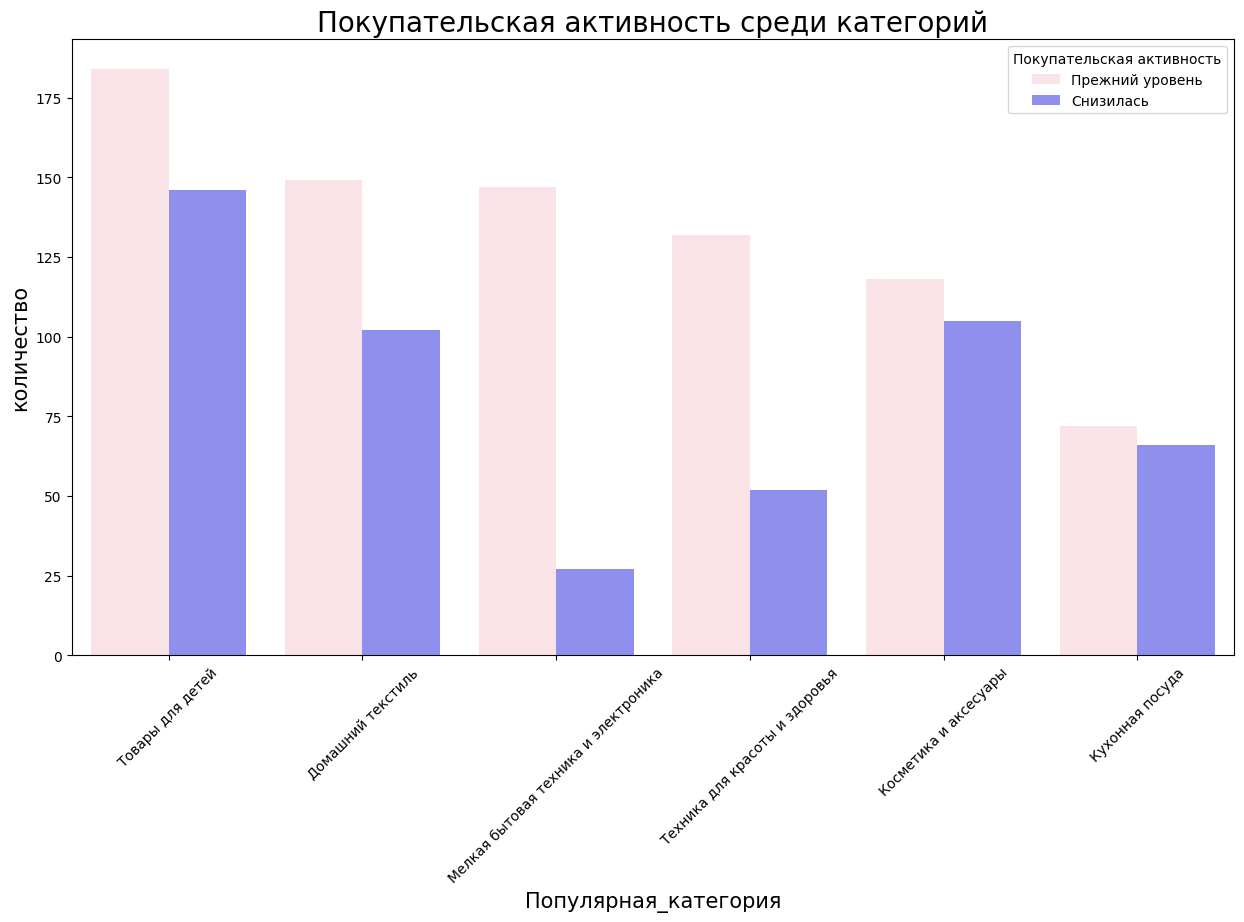

In [158]:
#сформируем график вкуса молока
plt.figure(figsize = ( 15 , 8 )) 
ax = sns.barplot(palette=['pink', 'blue'],
            alpha = 0.5,
            x = 'Популярная_категория', 
            y = 'count',
            hue = 'Покупательская активность',
            data = a
          )

plt.xlabel('Популярная_категория', size= 15)
plt.ylabel('количество', size= 15)
plt.title ('Покупательская активность среди категорий', size= 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

- больше всего активно покупающих клиентов среди категорий Техника (мелко-бытовая техника и техника доя красоты и здоровья),
- Среди категории кухонная посуда, косметика и аксессуары много клиентов с низкой покупательской активностью.
Вот и определились популярные разделы магазина

### profit

In [159]:
#  выгрузим категориальные и числовые признаки
sep (profit)

categorical variables:  ['Период']
numerical variables:  ['id', 'Выручка']


In [160]:
#ознакомления с ДатаСетом
#посмотрим статистику по числовым признакам
profit.drop(['id'], axis=1).describe()

,Выручка
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


- визуализируем размпределение числовых признаков

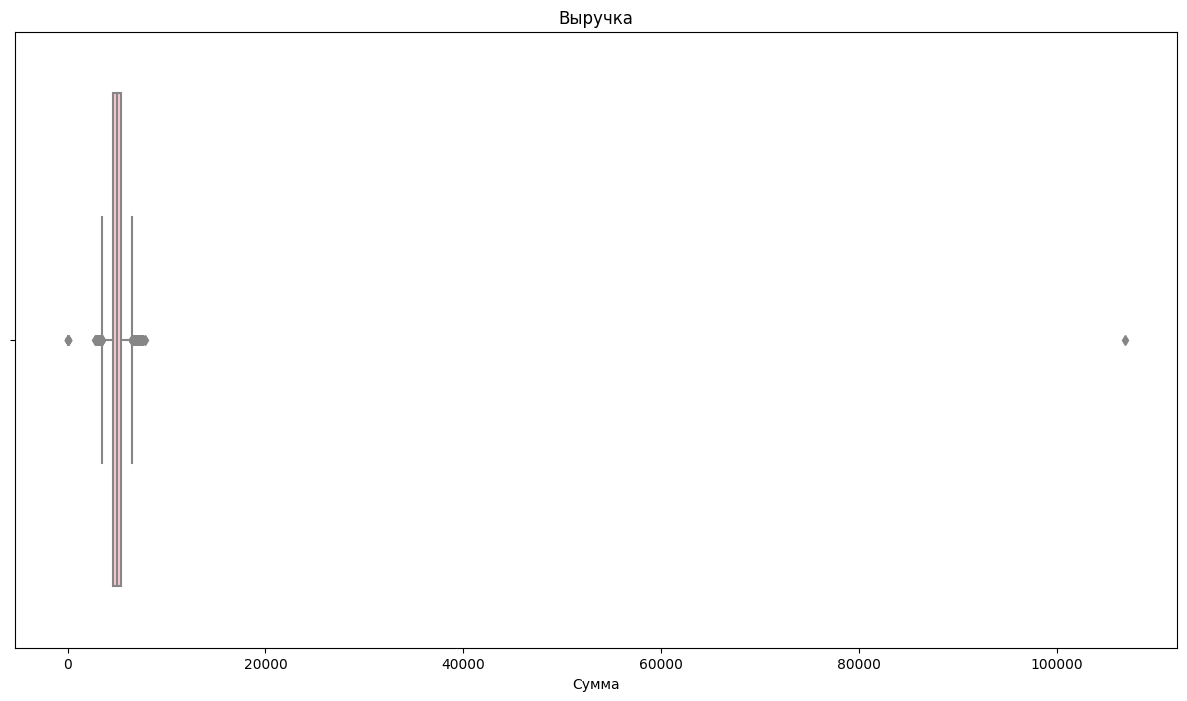

In [161]:
# построим бокс плот
plt.figure(figsize = ( 15 , 8 )) 
sns.boxplot(x = profit['Выручка'])
sns.set_palette(['pink'])
plt.title('Выручка')
plt.xlabel('Сумма')
plt.show()

- в данных имееться выброс как в большую, так и в меньшую сторону, посмотрим их поближе

In [162]:
profit[profit['Выручка']>20000]

,id,Период,Выручка
98,215380,текущий_месяц,106862.2


In [163]:
profit[profit['Выручка']<1000]

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


- из 3900  всего одно наблюдение с выбросом, что меньше 1%. Удалим данный выброс
- 6 наблюдений где выручк а= 0 - можно так же удалить, так как далее по заданию нас интерисуют клиенты, которые что-либо покупали за последние 3 месяца

In [164]:
#удаляем выброс (выручка более 20000)
profit.drop(index=np.where(profit['Выручка']>20000)[0], inplace=True)
#удаляем выброс (выручка = 0)
profit.drop(index=np.where(profit['Выручка']==0)[0], inplace=True)

- проверим как распределена выручка

<Figure size 1000x300 with 0 Axes>

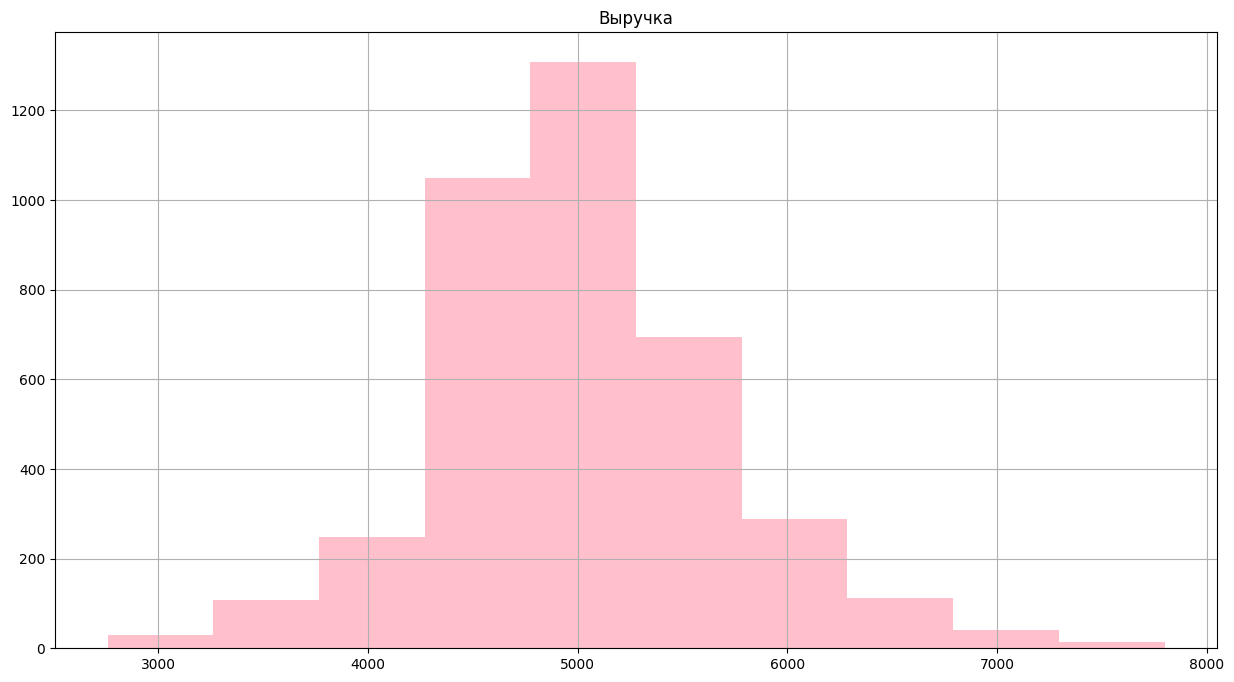

In [165]:
plt.figure(figsize=(10, 3))

profit[['Выручка']].hist( figsize=(15, 8))
sns.set_palette(['pink'])
plt.show()

- теперь у нас график с нормальным распределением

In [166]:
#ознакомления с ДатаСетом
#посмотрим статистику по не числовым признакам
profit.describe (include= ['object', 'bool'])

,Период
count,3893
unique,3
top,текущий_месяц
freq,1299


In [167]:
profit['Период'].unique()

array(['текущий_месяц', 'препредыдущий_месяц', 'предыдущий_месяц'],
      dtype=object)

данные за три месяца :'текущий_месяц', 'препредыдущий_месяц', 'предыдущий_месяц'
всего 3893 наблюдений

### time

In [168]:
#  выгрузим категориальные и числовые признаки
sep (time)

categorical variables:  ['Период']
numerical variables:  ['id', 'минут']


In [169]:
#ознакомления с ДатаСетом
#посмотрим статистику по числовым признакам
time.drop(['id'], axis=1).describe()

,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


- визуализируем размпределение числовых признаков

<Figure size 1000x300 with 0 Axes>

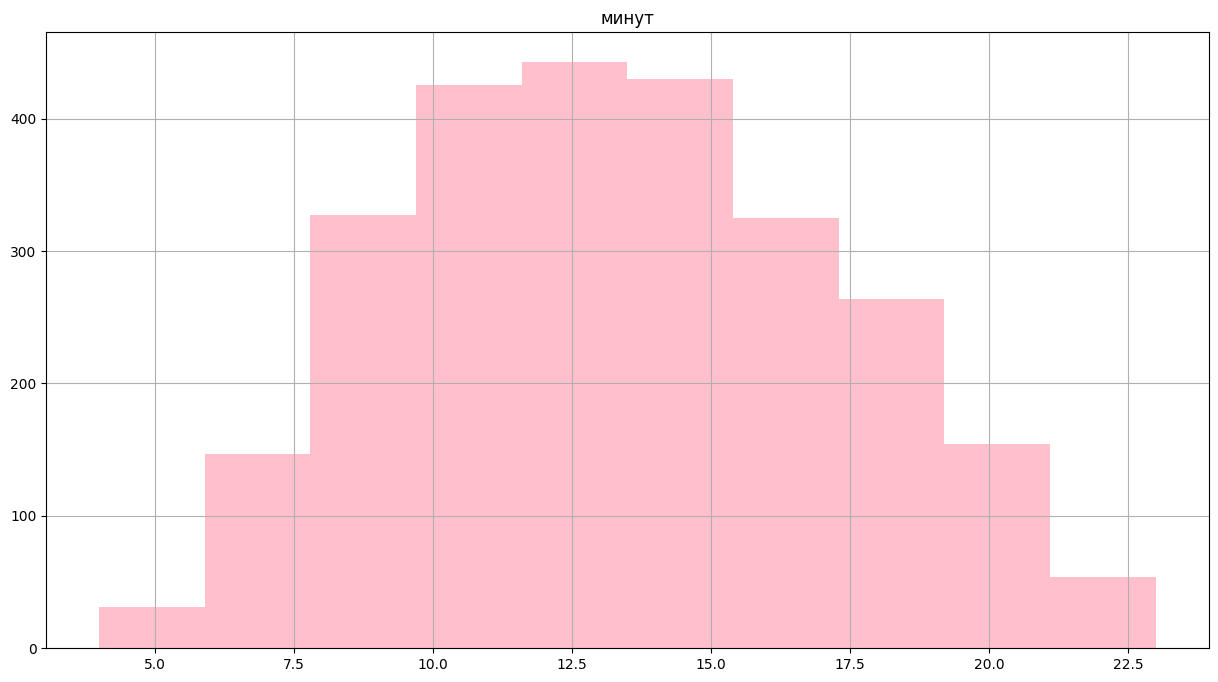

In [170]:
plt.figure(figsize=(10, 3))

time[['минут']].hist(figsize=(15, 8))
sns.set_palette(['pink'])
plt.show()

In [171]:
#ознакомления с ДатаСетом
#посмотрим статистику по не числовым признакам
time.describe (include= ['object', 'bool'])

,Период
count,2600
unique,2
top,текущий_месяц
freq,1300


In [172]:
time['Период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

- данные по минутам распределены нормально, без  выбросов
- в данных есть два периода 'текущий_месяц', 'предыдущий_месяц'
- данные содержат 2600 наблюдений

### ave_profit

In [173]:
#  выгрузим категориальные и числовые признаки
sep (ave_profit)

categorical variables:  []
numerical variables:  ['id', 'Прибыль']


In [174]:
#ознакомления с ДатаСетом
#посмотрим статистику по числовым признакам
ave_profit.drop(['id'], axis=1).describe()

,Прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


- визуализируем размпределение числовых признаков

<Figure size 1000x300 with 0 Axes>

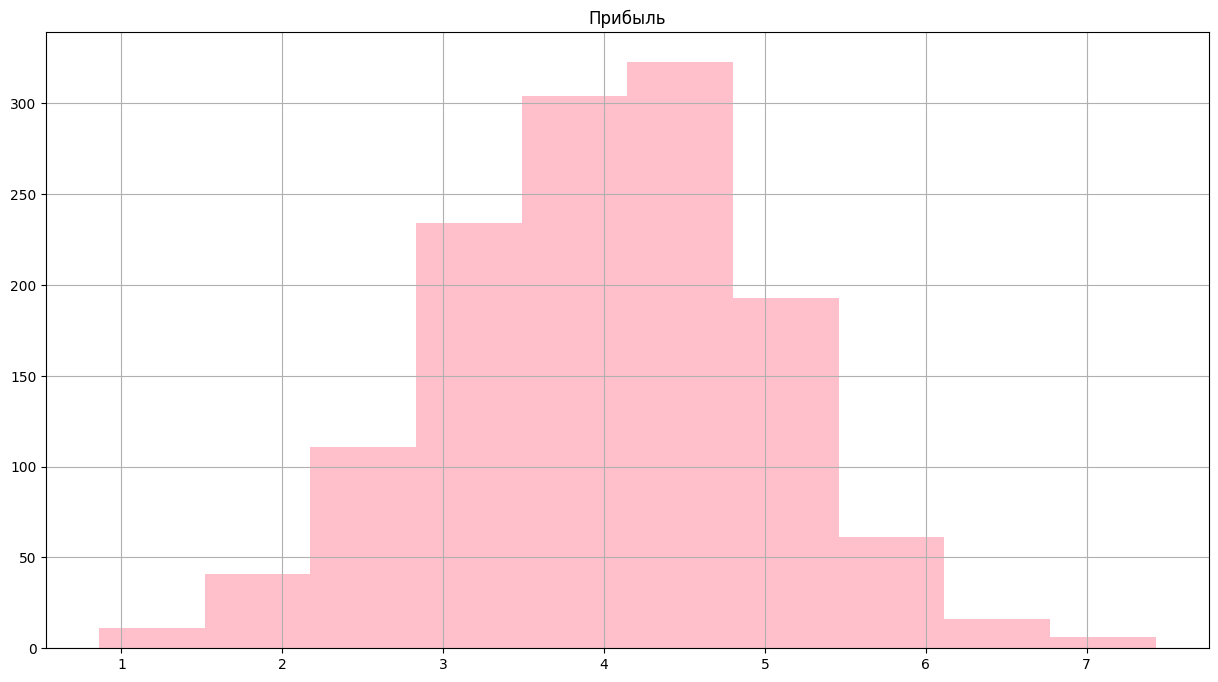

In [175]:
plt.figure(figsize=(10, 3))

ave_profit[['Прибыль',]].hist(figsize=(15, 8))
sns.set_palette(['pink'])
plt.show()

- данные по прибыли имеют нормальное распределение, без выбрасов
- в данных 1300 наблюдейний

- Отберем клиентов с покупательской активностью не менее 3х месяцев, т.е. таких , который что-либо покупали  в этот период. 
Для этого необходимо соеденить два фрейма cast_actions и profit. таблицы будем соеденять по общему столбцу id.

In [176]:
full_df = cast_actions

periods = ['текущий_месяц', 'предыдущий_месяц', 'препредыдущий_месяц']
for period in periods:
    profit_a = profit[profit['Период']==period]
    profit_a.columns = ['id', 'Период', f'Выручка_{period}']
    profit_a.drop('Период', axis= 1 , inplace= True)
    full_df = profit_a.merge(full_df, on="id", how="outer")
full_df


C:\Users\sheglova.arina\Anaconda3\envs\practicum\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215349,4472.0,5216.0,4971.6,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,4826.0,5457.5,5058.4,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,4793.0,6158.0,6610.4,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,4594.0,5807.5,5872.5,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,5124.0,4738.5,5388.5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216646,4725.0,4923.0,5224.6,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7
1296,216647,5183.0,4720.0,4448.3,Прежний уровень,премиум,да,4.0,5,906,0.94,Техника для красоты и здоровья,4,5,3,12
1297,215348,NaN,NaN,3293.1,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1298,215357,NaN,NaN,5986.3,Снизилась,стандарт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [177]:
# # удалим клиентов чья выруча за последние 3 отсутствовала
# full_df = full_df[full_df['Выручка_текущий_месяц'].notna()]
# full_df = full_df[full_df['Выручка_предыдущий_месяц'].notna()]
# full_df = full_df[full_df['Выручка_препредыдущий_месяц'].notna()]
# full_df

In [178]:
#разьеденим данные 
#profit_a = profit[profit['Период']=='текущий_месяц']
#profit_a.columns = ['id', 'Период', 'Выручка_текущий']
#profit_a.drop('Период', axis= 1 , inplace= True)
#a.rename(columns = {' Выручка ':' Выручка_текущий'})
#profit_b = profit[profit['Период']=='предыдущий_месяц']
#profit_b.columns = ['id', 'Период', 'Выручка_предыдущий']
#profit_b.drop('Период', axis= 1 , inplace= True)
#profit_c = profit[profit['Период']=='препредыдущий_месяц']
#profit_c.columns = ['id', 'Период', 'Выручка_препредыдущий']
#profit_c.drop('Период', axis= 1 , inplace= True)


#соеденим таблицы
#profit_full = profit_a.merge(profit_b, on="id", how="outer")
#profit_full = profit_full.merge(profit_c, on="id", how="outer")
#profit_full.head(3)

- объеденим два фрейма cast_actions и profit_full

In [179]:
# объеденим два фрейма cast_actions и profit_full

#full_df = cast_actions.merge(profit_full, on="id", how="outer")
#full_df


# удалим клиентов чья выруча за последние 3 отсутствовала
# full_df = full_df[full_df['Выручка_текущий_месяц'].notna()]
# full_df = full_df[full_df['Выручка_предыдущий_месяц'].notna()]
# full_df = full_df[full_df['Выручка_препредыдущий_месяц'].notna()]

In [180]:
# full_df.info()

In [181]:
print('после удаления клиентов, чья активность не была замечена в последние 3 месяца количество наблюдений синизилось')
print('количество клиентов до удаления', len(profit_a))
print('количество клиентов после  удаления', len(full_df))
print('Количество удаженныйх наблюдений' , len(profit_a) - len(full_df))

после удаления клиентов, чья активность не была замечена в последние 3 месяца количество наблюдений синизилось
количество клиентов до удаления 1297
количество клиентов после  удаления 1300
Количество удаженныйх наблюдений -3


**====================================================================================================**

### Вывод

**====================================================================================================**

__________________________________________________________________________________________________

**cast_actions**

__________________________________________________________________________________________________


При анализе статистическич характеристик данных по каждому числовому признаку можно отметить:

Числовые признаки:

    - 'Маркет_актив_6_мес', 'Длительность', 'Ошибка_сервиса' выглядят как нормальное распределение
    - 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал', 'Страниц_за_визит' имеют небольшое отклонение влево
    - интересный провал наблюдаеться в  столбце 'Акционные_покупки'


Не числовые признаки:

    - в таблице 1300 записей
    - в колонках 'Покупательская активность','Тип сервиса','Разрешить сообщать' по 2 уникальных значения
    -  в колонке 'Популярная_категория' 6 уникальных значений
    - Товары для детей самая популярная категория
    - покупательская способность клиентов в целом сохраняет прежний уровень
    - тип сервиса 'Стандарт' более популярный среди покупателей
    - больше половины покупателей оставили согласие на коммуникацию.




**Зависимость покупательской активности и Числовых признаков: 

    - расспределение Покупательской активности и Маркет_актив_6_мес: 
    
чем выше покупательская активность,тем ниже вероятность снижения пакупательской активности клиентов. 
На графике видно что клиенты, которые получили 4 и более макретинговых коммуникаций чаще сохраняют свою покупательскую активность.

    - расспределение Покупательской активности и Маркет_актив_тек_мес: 
    
из графика видно, что в текущем месяце было от 3 до 5 коммуникаций с клиентами.  
При 3 и 5 коммуникаций у большей половины клиентов поупательскя активность снизиласи. 
При 4 коммуникаций половина покупателей снизило свою покупательскую активность.
Возможно это месяц такой так как в графике с большем периодом  Маркет_актив_тек_мес данные немного другие. Нужно в целом посмотреть покупательскую способность в разрезе периода.


    - расспределение Покупательской активности и Длительность:
    
при длительности 650-700 дней и от 1050 дней с начала регистрации покупательская активность клиентов снижаеться больше, чем сохраняется


    - расспределение Покупательской активности и Акционные_покупки:
    
при среднемесячной доли покупок по акции от 0,13 до 0,17  Покупательской активности максимально сохраняеться;
при среднемесячной доли покупок по акции от 0,33 до 0,42  Покупательская активность снижена

    - расспределение Покупательской активности и Средний_просмотр_категорий_за_визит:
    
 здесь мы можем отметить, что покупалели, которые за последний меся просмотрел категорий  от 1 до 2 раз, чаще всего снижают покупательскую активность;
покупатели, просмотревшие от 3 и выше категорий сохраняют свою покупательскую активность

    - расспределение Покупательской активности и Неоплаченные_продукты_штук_квартал:

чеи больше товаров лежит в корзине, тем выше вероятность, что покупательская способность снижаеться; 
при 4х неоплаченных товаров в корзине покупательская активность сохраняеться, особенно она сильна при 1 необлаченном товаре в корзине. 

    - расспределение Покупательской активности  и Ошибка_сервиса:

от 1 до 3 ошибок сильно снижает покупательскую активность, но самое интересное, что с возрастанием ошибок сервиса покупателская активность не снижаеться. Можно сказать, что самые нетерпиливые сразу оставляют свой интерес к магазину. а самые лояльные клиенты остаються. 

    - расспределение Покупательской активности и Страниц_за_визит:

чем меньше (до 6 страниц) смотрит клиент, тем выше вероятность, что клиент снизит покупательскую активность. И наоборот, чем больше клиент просмотрел страниц за визит, тев выше покупательская активность клиента. Логично, возможно покупатель просто искал ему нужный товар.



**Зависимость покупательской активности и НЕЧисловых признаков: 

    - при  типе сервисе Премиум покупательская активности снижена
    - среди клиентов не давшие согласие, что бы можно им было присылать дополнительную информацию , больше вероятность снижения покупательской активности.
    - больше всего активно покупающих клиентов среди категорий Техника (мелко-бытовая техника и техника доя красоты и здоровья),
    - Среди категории кухонная посуда, косметика и аксессуары много клиентов с низкой покупательской активностью.


_____________________________________________________________________________________________

**profit**
__________________________________________________________________________________________________

**Числове признаки: 

после удаления выбрососв в колонке 'Выручка' от 20000 и выручка = 0,  график приобрел нормальное распределение


**НЕЧислове признаки: 

данные за три месяца :'текущий_месяц', 'препредыдущий_месяц', 'предыдущий_месяц'
всего 3893 наблюдений


__________________________________________________________________________________________________

**time**
__________________________________________________________________________________________________

- данные по минутам распределены нормально, без  выбросов
- в данных есть два периода 'текущий_месяц', 'предыдущий_месяц'
- данные содержат 2600 наблюдений


__________________________________________________________________________________________________

**ave_profit**
__________________________________________________________________________________________________

- данные по прибыли имеют нормальное распределение, без выбрасов
- в данных 1300 наблюдейний


## Шаг 4 Объединение таблиц

4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 
4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

- объеденим оставшиеся таблицы full_df и time

In [182]:
time = time

periods = ['текущий_месяц', 'предыдущий_месяц']
for period in periods:
    time_a = time[time['Период']==period]
    time_a.columns = ['id', 'Период', f'минут_{period}']
    time_a.drop('Период', axis= 1 , inplace= True)
    full_df = time_a.merge(full_df, on="id", how="outer")

# удалим клиентов чья выруча за последние 3 отсутствовала
full_df = full_df[full_df['минут_предыдущий_месяц'].notna()]
full_df = full_df[full_df['минут_текущий_месяц'].notna()]

full_df = full_df[full_df['Выручка_текущий_месяц'].notna()]
full_df = full_df[full_df['Выручка_предыдущий_месяц'].notna()]
full_df = full_df[full_df['Выручка_препредыдущий_месяц'].notna()]
full_df_id = full_df
full_df

C:\Users\sheglova.arina\Anaconda3\envs\practicum\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,минут_предыдущий_месяц,минут_текущий_месяц,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,12,10,4472.0,5216.0,4971.6,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,8,13,4826.0,5457.5,5058.4,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,11,13,4793.0,6158.0,6610.4,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,8,11,4594.0,5807.5,5872.5,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,10,10,5124.0,4738.5,5388.5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,14,7,4704.0,3664.0,4741.7,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,12,11,5299.0,4729.0,5353.0,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,12,18,5334.0,5160.0,5139.2,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,18,7,4725.0,4923.0,5224.6,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [183]:
# time_a = time[time['Период']=='текущий_месяц']
# time_a.columns = ['id', 'Период', 'минуты_текущий_месяц']
# time_a.drop('Период', axis= 1 , inplace= True)
# time_b = time[time['Период']=='предыдущий_месяц']
# time_b.columns = ['id', 'Период', 'минуты_препредыдущий']
# time_b.drop('Период', axis= 1 , inplace= True)
# full_time = time_a.merge(time_b, on="id", how="left")
# full_time.head(3)

In [184]:
# full_df = full_df.merge(full_time, on="id", how="left")
# full_df.info()

## Шаг 5 Корреляционный анализ

- Можно сразу отметить, что признаки id не нужен в обучающей выборке, так как не несут в себе информацию о клинте. Удалим его

In [185]:
full_df = full_df.drop(['id'], axis=1)

In [186]:
full_df.describe()

,минут_предыдущий_месяц,минут_текущий_месяц,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,13.470679,13.210648,4836.202160,4947.468750,5238.096065,4.256404,4.009259,602.967593,0.320069,3.267747,2.841821,4.184414,8.187500
std,3.937630,4.221794,333.514091,700.797239,834.318717,1.013525,0.696316,249.195823,0.249159,1.355125,1.974074,1.951719,3.978459
min,5.000000,4.000000,4098.000000,2890.000000,2758.700000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000
25%,10.750000,10.000000,4584.500000,4498.125000,4706.050000,3.700000,4.000000,409.500000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,13.000000,13.000000,4810.500000,5005.500000,5179.950000,4.200000,4.000000,606.500000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,17.000000,16.000000,5056.000000,5405.625000,5759.275000,4.900000,4.000000,806.250000,0.300000,4.000000,4.000000,6.000000,11.000000
max,23.000000,23.000000,5663.000000,6869.500000,7799.400000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


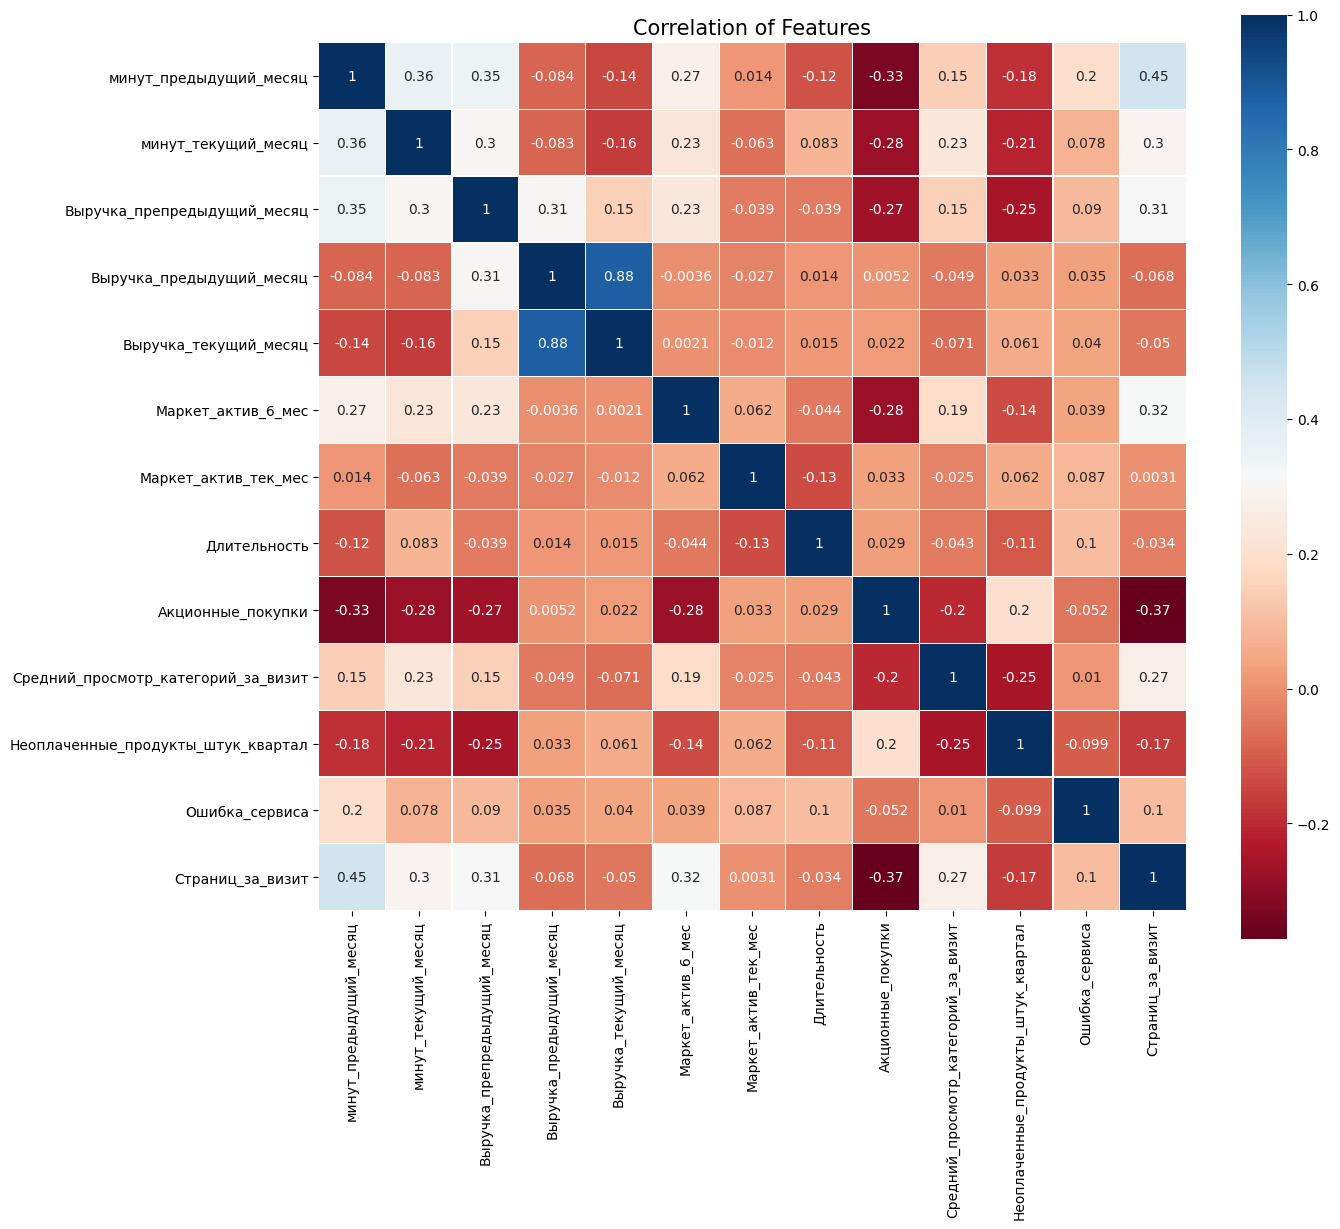

<Figure size 640x480 with 0 Axes>

In [187]:
#Посмотрим на корреляционные связи между признаками
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(full_df.corr('spearman'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2g')
plt.show()
plt.savefig('heatmap.png')

из корриляционного анализа можно отменить:

     - есть зависимость у  признаков Вырочка_текущий и Выручка_предыдущий
     - есть зависимость у  признаков Страниц за визит  и минуты_предыдущий

In [188]:
#sns.pairplot(full_df, hue = 'Покупательская активность', height = 2.5, kind = 'scatter')
#plt.show()

### Вывод

## Шаг 6 Использование пайплайнов

In [189]:
full_df.head(3)

,минут_предыдущий_месяц,минут_текущий_месяц,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,12,10,4472.0,5216.0,4971.6,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,8,13,4826.0,5457.5,5058.4,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,11,13,4793.0,6158.0,6610.4,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4


In [190]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [191]:
#sep (full_df)

In [192]:
df_train, df_test = train_test_split(full_df, test_size=0.25, random_state=RANDOM_STATE)

In [193]:
X_train = df_train.drop(['Покупательская активность'], axis=1)
y_train = df_train['Покупательская активность']
X_test = df_test.drop(['Покупательская активность'], axis=1)
y_test = df_test['Покупательская активность']

In [194]:
X_train

,минут_предыдущий_месяц,минут_текущий_месяц,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1232,19,13,4818.0,5400.0,6034.4,стандарт,да,4.3,4,514,0.11,Домашний текстиль,3,3,3,9
549,17,12,4460.0,5004.5,5606.4,стандарт,да,3.9,4,627,0.24,Товары для детей,3,3,7,8
270,10,7,4441.0,5612.5,6103.9,стандарт,нет,4.1,5,657,0.35,Товары для детей,2,6,2,4
331,18,18,5315.0,4541.0,5341.8,стандарт,нет,5.5,3,712,0.95,Домашний текстиль,2,0,6,11
802,10,10,4979.0,5789.0,6621.0,стандарт,да,4.3,4,283,0.11,Кухонная посуда,3,4,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,14,17,4603.0,5378.0,4835.9,премиум,да,5.4,4,723,0.15,Техника для красоты и здоровья,5,3,2,11
1099,12,14,5171.0,5501.0,5917.0,премиум,да,5.5,5,953,0.24,Домашний текстиль,2,2,4,14
1134,10,9,5186.0,5310.5,5548.4,стандарт,да,5.6,3,660,0.24,Домашний текстиль,5,3,4,9
864,12,17,4831.0,4381.0,4901.0,стандарт,нет,4.4,3,206,0.29,Товары для детей,4,4,6,12


In [195]:
print('Размер тренировочной выборки', X_train.shape)

Размер тренировочной выборки (972, 16)


In [196]:
print('Размер тестовой выборки', df_test.shape)

Размер тестовой выборки (324, 17)


In [197]:
ohe_columns = [
    'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория'
]
num_columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц', 'Выручка_препредыдущий_месяц', \
               'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц', 'Маркет_актив_6_мес', \
               'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', \
              'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']



In [198]:
#'минут_предыдущий_месяц', 'минут_текущий_месяц'
# создаём списки с названиями признаков
#ohe_columns = ['Разрешить сообщать', 'Популярная_категория']
#ord_columns = ['Тип сервиса']
#num_columns_st = ['Выручка_препредыдущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',  'Средний_просмотр_категорий_за_визит',  'Ошибка_сервиса', 'Страниц_за_визит']
#num = ['Выручка_препредыдущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',  'Средний_просмотр_категорий_за_визит',  'Ошибка_сервиса', 'Страниц_за_визит','Акционные_покупки','Неоплаченные_продукты_штук_квартал']
#num =['Выручка_препредыдущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц', 'Маркет_актив_6_мес', 'Длительность',  'Средний_просмотр_категорий_за_визит', 'Ошибка_сервиса', 'Страниц_за_визит']

In [199]:
ohe_pipe = Pipeline(
    [
        ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ]
)

In [200]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [201]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
 
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },


    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [203]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [204]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [205]:
# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)[:, 1]

#переводим признаки в 0,1
y_test_encoded = LabelEncoder().fit_transform(y_test)
y_test_pred_encoded = LabelEncoder().fit_transform(y_test_pred)

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_encoded, y_test_pred_encoded)}')

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

- Командой randomized_search.cv_results_ получим все результаты и сделаем из них датафрейм. Выведем четыре столбца, отсортируем по rank_test_score — рейтингу качества моделей

In [206]:
result = pd.DataFrame(randomized_search.cv_results_)
print(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')) 

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

### Вывод


    Лучше всего справилась модель LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='liblinear') 
    Метрика лучшей модели на кросс-валидации: 0.8877
    Метрика ROC-AUC на тестовой выборке: 0.8419

## Шаг 7 Анализ важности признаков

In [207]:
# обучим лучшую модель
#best_model = randomized_search.best_estimator_
#best_model.fit(X_train, y_train)
#X_train_preprocessed = best_model.named_steps['preprocessor'].transform(X_train)
#X_test_preprocessed = best_model.named_steps['preprocessor'].transform(X_test)
#X_all=best_model.named_steps['preprocessor'].transform(full_df)

In [208]:
#explainer = shap.Explainer(best_model.named_steps['models'], X_all)

In [209]:
#shap_values = explainer(X_all)
#explanation = shap.Explanation(shap_values, X_all)

- используя метод summary_plot с plot_type «bar» для построения графика важности функции 

In [210]:
#построим график важности переменной
#shap.summary_plot(shap_values, X_all, plot_type='bar', feature_names=feature_names, show=False)

#plt.title('график важности переменной')
#plt.show()

In [211]:
best_model = randomized_search.best_estimator_
kn_model = best_model.named_steps['models']

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [212]:
X_train_2 = best_model.named_steps['preprocessor'].fit_transform(X_train)
X_test_2 = best_model.named_steps['preprocessor'].transform(X_test)

NameError: name 'best_model' is not defined

In [213]:
kn_model 

NameError: name 'kn_model' is not defined

In [214]:
explainer = shap.Explainer(kn_model.predict_proba, X_train_2)

NameError: name 'kn_model' is not defined

In [215]:
shap_values = explainer(X_test_2)

NameError: name 'explainer' is not defined

In [216]:
features_out = best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out().tolist() + num_columns

NameError: name 'best_model' is not defined

In [217]:
features_out

NameError: name 'features_out' is not defined

In [218]:
shap.summary_plot(shap_values[:, :, 1], X_test_2, plot_type="bar", feature_names=features_out)

NameError: name 'shap_values' is not defined

### ВЫВОД

Больше всего на модель влияет признаки:

    - содержащий количество страниц, которые пользователь посещает за визит 
    - количество минут, которые пользователь проводил на сайте в предыдущий месяц
    - акционные покупки
    - средний просмотр категорий за визит
    - минуты за текущий месяц 
    - выручка за предыдущий месяц

Меньше всего на модель влияют:

    - категории товара 
    - количество маркетинговых коммуникаций в текущем месяце
    - тип сервиса
    - ошибки сервиса


Признаки которые меньше всего влияют - следует исключить из модели. А на признаки которые больше всего влияют следует обратить особое внимание. Можно сделать вывод, что посещаемость сайта и длительность посещения сильнее всего влияют на активность пользователей. Следовательно от этого можно отталкиваться при принятии решений

## Шаг 8 Сегментация покупателей

    для выполнеии сегментации клиентов по прибыльности пресоеденим к нашим данным, данные по прибыльности 
    присоединение выполним командой merge по колонке id

In [219]:
df_segment = pd.merge(full_df_id, ave_profit)
df_segment

,id,минут_предыдущий_месяц,минут_текущий_месяц,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Прибыль
0,215349,12,10,4472.0,5216.0,4971.6,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4.16
1,215350,8,13,4826.0,5457.5,5058.4,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,3.13
2,215351,11,13,4793.0,6158.0,6610.4,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4.87
3,215352,8,11,4594.0,5807.5,5872.5,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4.21
4,215353,10,10,5124.0,4738.5,5388.5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,14,7,4704.0,3664.0,4741.7,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4.44
1292,216644,12,11,5299.0,4729.0,5353.0,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,6.11
1293,216645,12,18,5334.0,5160.0,5139.2,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,3.29
1294,216646,18,7,4725.0,4923.0,5224.6,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4.03


In [220]:
df_segment.head()

,id,минут_предыдущий_месяц,минут_текущий_месяц,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Прибыль
0,215349,12,10,4472.0,5216.0,4971.6,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4.16
1,215350,8,13,4826.0,5457.5,5058.4,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,3.13
2,215351,11,13,4793.0,6158.0,6610.4,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4.87
3,215352,8,11,4594.0,5807.5,5872.5,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4.21
4,215353,10,10,5124.0,4738.5,5388.5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,3.95


In [221]:
df_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   минут_предыдущий_месяц               1296 non-null   int64  
 2   минут_текущий_месяц                  1296 non-null   int64  
 3   Выручка_препредыдущий_месяц          1296 non-null   float64
 4   Выручка_предыдущий_месяц             1296 non-null   float64
 5   Выручка_текущий_месяц                1296 non-null   float64
 6   Покупательская активность            1296 non-null   object 
 7   Тип сервиса                          1296 non-null   object 
 8   Разрешить сообщать                   1296 non-null   object 
 9   Маркет_актив_6_мес                   1296 non-null   float64
 10  Маркет_актив_тек_мес                 1296 non-null   int64  
 11  Длительность                  

In [222]:
probabilities = best_model.predict_proba(df_segment)[:, 1]
df_segment['вероятность_снижения_активности'] = probabilities

NameError: name 'best_model' is not defined

In [223]:
df_segment.sample(5)

,id,минут_предыдущий_месяц,минут_текущий_месяц,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Прибыль
529,215881,17,13,4786.0,5084.0,4955.3,Прежний уровень,стандарт,да,5.1,3,709,0.30,Товары для детей,5,1,6,9,2.53
395,215747,10,10,4168.0,3555.0,4089.3,Снизилась,стандарт,да,3.5,5,452,0.93,Товары для детей,1,5,5,4,3.32
476,215828,10,14,5240.0,4405.0,5259.1,Снизилась,стандарт,да,5.3,4,191,0.30,Товары для детей,4,4,3,16,3.30
316,215668,6,9,4723.0,5567.5,5293.2,Снизилась,премиум,да,4.4,4,343,0.94,Товары для детей,2,9,2,2,4.49
329,215681,15,19,5086.0,4477.0,4079.2,Снизилась,стандарт,нет,4.8,3,788,0.21,Товары для детей,2,3,7,16,4.79


Для выделения группы клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью, нам необходимо определить порог, который будет сообщать о высокой вероятности и высокой прибыльности

In [224]:
fig = px.histogram(df_segment,
                  x = 'вероятность_снижения_активности',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение вероятности снижения активности')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['id', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Прибыль'] but received: вероятность_снижения_активности

In [ ]:
percentile = df_segment['вероятность_снижения_активности'].quantile(0.75)
percentile

In [ ]:
fig = px.histogram(df_segment,
                  x = 'Прибыль',
                  marginal = 'box',
                  opacity = 0.5,
                  barmode = 'group',
                  title = 'Распределение прибыли')
fig.show()

In [225]:
df_segment['Прибыль'].mean()

3.99770061728395

In [226]:
percentile = df_segment['Прибыль'].quantile(0.75)
percentile

4.67

Примем решение о том, что высоким показателем прибыли будут считаться значения выше 3 квартиля, а вероятность_снижения_активности выше 0.5

In [227]:
df_high_income = df_segment[(df_segment['вероятность_снижения_активности'] >= 0.5) & (df_segment['Прибыль'] >= 4.67)]

KeyError: 'вероятность_снижения_активности'

In [ ]:
df_high_income.info()

В данный сегмент попадает 107 пользователей. Они приносят больше прибыли чем 75 % пользователей и у них высокая вероятность ухода. Изучим данный сегмент

In [228]:
def plot_histograms_for_segmen(dataframe1, dataframe2, num_columns):
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2

    fig = make_subplots(rows=rows, cols=2, subplot_titles=num_columns)

    for i, column in enumerate(num_columns):
        row = (i // 2) + 1
        col = (i % 2) + 1

        fig.add_trace(go.Histogram(x=dataframe1[column], nbinsx=20, name='df_segment', histnorm='probability', marker_color='pink'), row=row, col=col)
        fig.add_trace(go.Histogram(x=dataframe2[column], nbinsx=20, name='df_high_income', histnorm='probability', marker_color='blue'), row=row, col=col)

        fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray', row=row, col=col)
        fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray', row=row, col=col)

        fig.update_xaxes(title_text=column, row=row, col=col)
        fig.update_yaxes(title_text='Количество', row=row, col=col)

    fig.update_layout(showlegend=True, height=400*rows, width=900, title_text="Гистограммы")
    fig.show()

In [229]:
col_list = ['Страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'Выручка_текущий_месяц',
            'Выручка_препредыдущий_месяц', 'Средний_просмотр_категорий_за_визит', 'Акционные_покупки', 
            'Длительность', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес']

plot_histograms_for_segmen(df_segment, df_high_income, col_list)

NameError: name 'df_high_income' is not defined

In [230]:
means = {
    'high_income': [
        df_high_income['Выручка_текущий_месяц'].mean(),
        df_high_income['Выручка_предыдущий_месяц'].mean(),
        df_high_income['Выручка_препредыдущий_месяц'].mean()
    ],
    'df_segment': [
        df_segment['Выручка_текущий_месяц'].mean(),
        df_segment['Выручка_предыдущий_месяц'].mean(),
        df_segment['Выручка_препредыдущий_месяц'].mean()
    ]
}


df_comparison = pd.DataFrame(means, index=['Текущий_месяц', 'Предыдущий_месяц', 'Предпредыдущий_месяц'])
df_comparison

NameError: name 'df_high_income' is not defined

In [231]:
def plot_pie_charts(dataframe1, dataframe2, columns):
    subplot_titles = ['df_segment', 'df_high_income']
    fig_width = 1000
    fig_height = 600

    for column in columns:
        fig = go.Figure()

        labels1 = dataframe1[column].value_counts().index
        sizes1 = dataframe1[column].value_counts().values

        fig.add_trace(go.Pie(labels=labels1, values=sizes1, title=subplot_titles[0],
                             textinfo='percent+label', hole=0.3,
                             marker=dict(colors=['#ff9999', '#66b3ff', '#99ff99'])))
        fig.update_layout(
            title=f"Pie Chart for {column} in {subplot_titles[0]}",
            width=fig_width,
            height=fig_height
        )
        fig.show()

        fig2 = go.Figure()
        labels2 = dataframe2[column].value_counts().index
        sizes2 = dataframe2[column].value_counts().values

        fig2.add_trace(go.Pie(labels=labels2, values=sizes2, title=subplot_titles[1],
                              textinfo='percent+label', hole=0.3,
                              marker=dict(colors=['#ff9999', '#66b3ff', '#99ff99'])))
        fig2.update_layout(
            title=f"Pie Chart for {column} in {subplot_titles[1]}",
            width=fig_width,
            height=fig_height
        )
        fig2.show()

In [232]:
cat_columns = ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']

In [233]:
plot_pie_charts(df_segment, df_high_income, cat_columns)

NameError: name 'df_high_income' is not defined

### ВЫВОД

- У данной категории преобладают покупатели категории товары для детей и косметика и аксессуары, 31% и 27% соответственно. В то время как у всех данных на данные категории приходятся 25% и 19%.

- На 6% больше пользователей приносящих высокую прибыль пользуются тарифом 'премиум'.

- Пользователи данного сегмента чаще всего просматривают две категории.

- Они в среднем проводят около 10 минут на сайте, что меньше чем в среднем все пользователи, а также не просматривают больше 5 страниц за визит. Возможно их не устраивает сайт.

- Средняя выручка в свою очередь тоже меньше, чем в среднем. Однако она увеличивается к текущему месяцу, что хороший знак.

Рекомендации: 

    - Используйте данные о времени пребывания на сайте и количестве просмотренных страниц для определения областей, где пользователи проводят больше времени и где возможно улучшить пользовательский опыт. Это может включать улучшение навигации, добавление интерактивных элементов или упрощение процесса покупки

    - Используйте данные о просмотрах категорий и предыдущих покупках, чтобы предлагать персонализированные рекомендации покупателям. Например, можно показывать рекомендации на основе их предыдущих покупок или просматриваемых категорий.

    - Учитывая, что покупатели со сниженным уровнем активности покупают больше товаров по акции, можно предложить им специальные маркетинговые акции и скидки, чтобы стимулировать их покупательскую активность. Например, можно создать ограниченное предложение по времени или предложить бесплатную доставку для определенного объема покупки.

    - Рассмотрите внедрение программы лояльности или бонусной системы, чтобы поощрять покупателей повторно возвращаться и делать покупки. Это может включать сбор бонусных баллов, предоставление эксклюзивных предложений и привилегий для участников программы лояльности

## Шаг 9 ОБЩИЙ ВЫВОД

**====================================================================================================**

<font color='blue'>**ЗАГРУЗКА ДАННЫХ**:</font>

**====================================================================================================**
__________________________________________________________________________________________________

<font color='blue'>**cast_actions**:</font>- данные о поведении покупателей на вайте
__________________________________________________________________________________________________

фрейм содердит 1300 строк и 13 столбцов.
При этом 7 столбцов с целочисленными данными тип < int64 >, 2 с числовыми данными типа < float64 > и 4 столбца типа < object >.

**столбцы таблицы и информация, которую они содержат:**

    'id' — номер покупателя в корпоративной базе данных.
    'Покупательская активность' — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    'Тип сервиса' — уровень сервиса, например «премиум» и «стандарт».
    'Разрешить сообщат'ь — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    'Маркет_актив_6_мес' — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    'Маркет_актив_тек_мес' — количество маркетинговых коммуникаций в текущем месяце.
    'Длительность' — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    'Акционные_покупки' — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    'Популярная_категория' — самая популярная категория товаров у покупателя за последние 6 месяцев.
    'Средний_просмотр_категорий_за_визит' — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    'Неоплаченные_продукты_штук_квартал' — общее число неоплаченных товаров в корзине за последние 3 месяца.
    'Ошибка_сервиса' — число сбоев, которые коснулись покупателя во время посещения сайта.
    'Страниц_за_визит' — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

 - В таблице нет дубликатов, нет пропусков, таблица соотвествует описанию. 

__________________________________________________________________________________________________

<font color='blue'>**profit**:</font>- данные о выручке с покупателей
__________________________________________________________________________________________________

фрейм содердит 3900 строк и 3 столбцов.
При этом 1 столбец с целочисленными данными тип < int64 >, 1 с числовыми данными типа < float64 > и 1 столбец типа < object >.

**столбцы таблицы и информация, которую они содержат:**
    
    'id' — номер покупателя в корпоративной базе данных.
    'Период' — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    'Выручка'' — сумма выручки за период.
    
 - В таблице нет дубликатов, нет пропусков, таблица соотвествует описанию. 

__________________________________________________________________________________________________

<font color='blue'>**time**:</font>- данные о времени (минуты), проведенном покупателями на сайте
__________________________________________________________________________________________________

фрейм содердит 2600 строк и 3 столбцов.
При этом 2 столбца с целочисленными данными тип < int64 > и 1 столбец типа < object >.

**столбцы таблицы и информация, которую они содержат:**
    
    'id' — номер покупателя в корпоративной базе данных.
    'Период' — название периода, во время которого зафиксировано общее время.
    'минут' — значение времени, проведённого на сайте, в минутах.

<font color='red'>Обратить внимание:</font>

в колонке Период имееться опечатка в слове предыдцщий_месяц

 - В таблице нет дубликатов, нет пропусков, таблица соотвествует описанию. 

__________________________________________________________________________________________________

<font color='blue'>**ave_profit**:</font>- данные о выручке с покупателей
_____________________________________________

фрейм содердит 1300 строк и 2 столбца.
При этом 1 столбец с целочисленными данными тип < int64 > и 1 с числовыми данными типа < float64 >.

**столбцы таблицы и информация, которую они содержат:**

    'id' — номер покупателя в корпоративной базе данных.
    'Прибыль' — значение прибыли.

 - В таблице нет дубликатов, нет пропусков, таблица соотвествует описанию. 
 
 
 
**====================================================================================================**

<font color='blue'>**ПЕРЕРАБОТКА ДАННЫХ**:</font>

**====================================================================================================**
 
 __________________________________________________________________________________________________

<font color='blue'>**cast_actions**:</font>
__________________________________________________________________________________________________

- нет отсутсвующих значений
- в колонке 'Тип сервиса' был неявный дубликат, который заменили с на 'стандартт', на  'стандарт'

__________________________________________________________________________________________________

<font color='blue'>**profit**:</font>
__________________________________________________________________________________________________

- нет отсутсвующих значений
- нет отсутсвующих значений

__________________________________________________________________________________________________

<font color='blue'>**time**:</font>
__________________________________________________________________________________________________

- нет отсутсвующих значений
- неявные дубликаты не обнаруженны
- в колонке 'Период' была замечена опечатка. Произвели замену с 'предыдцщий_месяц' на 'предыдущий_месяц'


<font color='blue'>**ave_profit**:</font>
__________________________________________________________________________________________________

- нет отсутсвующих значений
- неявные дубликаты не обнаруженны


Переработка данных завершена, таблицы готовы к исследовательскому анализу. 

**====================================================================================================**

<font color='blue'>**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ**:</font>

**====================================================================================================**

__________________________________________________________________________________________________

<font color='blue'>**cast_actions**</font>

__________________________________________________________________________________________________


При анализе статистическич характеристик данных по каждому числовому признаку можно отметить:

Числовые признаки:

    - 'Маркет_актив_6_мес', 'Длительность', 'Ошибка_сервиса' выглядят как нормальное распределение
    - 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал', 'Страниц_за_визит' имеют небольшое отклонение влево
    - интересный провал наблюдаеться в  столбце 'Акционные_покупки'


Не числовые признаки:

    - в таблице 1300 записей
    - в колонках 'Покупательская активность','Тип сервиса','Разрешить сообщать' по 2 уникальных значения
    -  в колонке 'Популярная_категория' 6 уникальных значений
    - Товары для детей самая популярная категория
    - покупательская способность клиентов в целом сохраняет прежний уровень
    - тип сервиса 'Стандарт' более популярный среди покупателей
    - больше половины покупателей оставили согласие на коммуникацию.




**Зависимость покупательской активности и Числовых признаков: 

    - расспределение Покупательской активности и Маркет_актив_6_мес: 
    
чем выше покупательская активность,тем ниже вероятность снижения пакупательской активности клиентов. 
На графике видно что клиенты, которые получили 4 и более макретинговых коммуникаций чаще сохраняют свою покупательскую активность.

    - расспределение Покупательской активности и Маркет_актив_тек_мес: 
    
из графика видно, что в текущем месяце было от 3 до 5 коммуникаций с клиентами.  
При 3 и 5 коммуникаций у большей половины клиентов поупательскя активность снизиласи. 
При 4 коммуникаций половина покупателей снизило свою покупательскую активность.
Возможно это месяц такой так как в графике с большем периодом  Маркет_актив_тек_мес данные немного другие. Нужно в целом посмотреть покупательскую способность в разрезе периода.


    - расспределение Покупательской активности и Длительность:
    
при длительности 650-700 дней и от 1050 дней с начала регистрации покупательская активность клиентов снижаеться больше, чем сохраняется


    - расспределение Покупательской активности и Акционные_покупки:
    
при среднемесячной доли покупок по акции от 0,13 до 0,17  Покупательской активности максимально сохраняеться;
при среднемесячной доли покупок по акции от 0,33 до 0,42  Покупательская активность снижена

    - расспределение Покупательской активности и Средний_просмотр_категорий_за_визит:
    
 здесь мы можем отметить, что покупалели, которые за последний меся просмотрел категорий  от 1 до 2 раз, чаще всего снижают покупательскую активность;
покупатели, просмотревшие от 3 и выше категорий сохраняют свою покупательскую активность

    - расспределение Покупательской активности и Неоплаченные_продукты_штук_квартал:

чеи больше товаров лежит в корзине, тем выше вероятность, что покупательская способность снижаеться; 
при 4х неоплаченных товаров в корзине покупательская активность сохраняеться, особенно она сильна при 1 необлаченном товаре в корзине. 

    - расспределение Покупательской активности  и Ошибка_сервиса:

от 1 до 3 ошибок сильно снижает покупательскую активность, но самое интересное, что с возрастанием ошибок сервиса покупателская активность не снижаеться. Можно сказать, что самые нетерпиливые сразу оставляют свой интерес к магазину. а самые лояльные клиенты остаються. 

    - расспределение Покупательской активности и Страниц_за_визит:

чем меньше (до 6 страниц) смотрит клиент, тем выше вероятность, что клиент снизит покупательскую активность. И наоборот, чем больше клиент просмотрел страниц за визит, тев выше покупательская активность клиента. Логично, возможно покупатель просто искал ему нужный товар.



**Зависимость покупательской активности и НЕЧисловых признаков: 

    - при  типе сервисе Премиум покупательская активности снижена
    - среди клиентов не давшие согласие, что бы можно им было присылать дополнительную информацию , больше вероятность снижения покупательской активности.
    - больше всего активно покупающих клиентов среди категорий Техника (мелко-бытовая техника и техника доя красоты и здоровья),
    - Среди категории кухонная посуда, косметика и аксессуары много клиентов с низкой покупательской активностью.


_____________________________________________________________________________________________

<font color='blue'>**profit**</font>
__________________________________________________________________________________________________

**Числове признаки: 

после удаления выбрососв в колонке 'Выручка' от 20000 и выручка = 0,  график приобрел нормальное распределение


**НЕЧислове признаки: 

данные за три месяца :'текущий_месяц', 'препредыдущий_месяц', 'предыдущий_месяц'
всего 3893 наблюдений


__________________________________________________________________________________________________

<font color='blue'>**time**</font>
__________________________________________________________________________________________________

- данные по минутам распределены нормально, без  выбросов
- в данных есть два периода 'текущий_месяц', 'предыдущий_месяц'
- данные содержат 2600 наблюдений


__________________________________________________________________________________________________

<font color='blue'>**ave_profit**</font>
__________________________________________________________________________________________________

- данные по прибыли имеют нормальное распределение, без выбрасов
- в данных 1300 наблюдейний

**====================================================================================================**

<font color='blue'>**ПАЙПЛАЙН**:</font>

**====================================================================================================**

    - Лучше всего справилась модель LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='liblinear')

    - Метрика лучшей модели на кросс-валидации: 0.8877

    - Метрика ROC-AUC на тестовой выборке: 0.8419

**====================================================================================================**

<font color='blue'>**АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ**:</font>

**====================================================================================================**


Больше всего на модель влияет признаки:

    - содержащий количество страниц, которые пользователь посещает за визит 
    - количество минут, которые пользователь проводил на сайте в предыдущий месяц
    - акционные покупки
    - средний просмотр категорий за визит
    - минуты за текущий месяц 
    - выручка за предыдущий месяц

Меньше всего на модель влияют:

    - категории товара 
    - количество маркетинговых коммуникаций в текущем месяце
    - тип сервиса
    - ошибки сервиса
    
**====================================================================================================**

<font color='blue'>**ВЫСОКОПРИБЫЛЬНЫЙ СЕГМЕНТ**:</font>

**====================================================================================================**

Данная категория имеет среднюю выручку меньше чем в среднем, однако она увеличивается от месяца к месяцу. У данной категории преобладают покупатели категории товары для детей и косметика и аксессуары, 31% и 27% соответственно. В то время как у всех данных на данные категории приходятся 25% и 19%. Также на 6% больше пользователей приносящих высокую прибыль пользуются тарифом 'премиум'.

Они в среднем проводят около 10 минут на сайте, что меньше чем в среднем все пользователи, а также не просматривают больше 5 страниц за визит. Возможно их не устраивает сайт.

Рекомендации: 

    - Используйте данные о времени пребывания на сайте и количестве просмотренных страниц для определения областей, где пользователи проводят больше времени и где возможно улучшить пользовательский опыт. Это может включать улучшение навигации, добавление интерактивных элементов или упрощение процесса покупки

    - Используйте данные о просмотрах категорий и предыдущих покупках, чтобы предлагать персонализированные рекомендации покупателям. Например, можно показывать рекомендации на основе их предыдущих покупок или просматриваемых категорий.

    - Учитывая, что покупатели со сниженным уровнем активности покупают больше товаров по акции, можно предложить им специальные маркетинговые акции и скидки, чтобы стимулировать их покупательскую активность. Например, можно создать ограниченное предложение по времени или предложить бесплатную доставку для определенного объема покупки.

    - Рассмотрите внедрение программы лояльности или бонусной системы, чтобы поощрять покупателей повторно возвращаться и делать покупки. Это может включать сбор бонусных баллов, предоставление эксклюзивных предложений и привилегий для участников программы лояльности